<a href="https://colab.research.google.com/github/phongloihong/image-depth-estimation/blob/main/Image_Depth_Stereo_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!gdown 1KlSKRw1KnbuU_N-YIyj9-e5pZDnnWI0u
!unzip /content/Tsukuba.zip -d /content/tsukuba

Downloading...
From: https://drive.google.com/uc?id=1KlSKRw1KnbuU_N-YIyj9-e5pZDnnWI0u
To: /content/Tsukuba.zip
100% 354k/354k [00:00<00:00, 81.7MB/s]
Archive:  /content/Tsukuba.zip
mapname:  conversion of  failed
replace /content/tsukuba/left.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Read images and create zero matrix

In [ ]:
LEFT_IMAGE = '/content/tsukuba/left.png'
RIGHT_IMAGE = '/content/tsukuba/right.png'
SCALE = 16
MAX_VALUE = 255
DISPARITY_RANGE = 16

left = cv2.imread(LEFT_IMAGE, 0).astype(np.float32)
right = cv2.imread(RIGHT_IMAGE, 0).astype(np.float32)

hight, width = left.shape[:2]
dept = np.zeros((hight, width))

In [ ]:
def l1_distance(x, y):
  return abs(x - y)

def l2_distance(x,y):
  return (x - y) ** 2

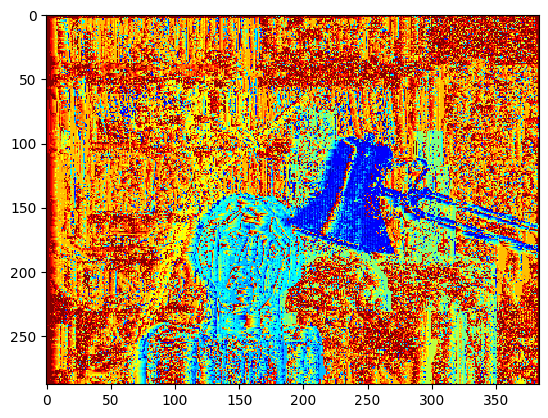

In [ ]:
def calculate_dept(hight, width):
  for y in range(hight):
    for x in range(width):
      d = 0;
      cost_min = MAX_VALUE;
      for j in range(DISPARITY_RANGE):
        if x - j < 0:
          continue;

        cost = l1_distance(int(left[y, x]), int(right[y, x - j]))
        if cost < cost_min:
          cost_min = cost
          d = j

      dept[y, x] = d

  return dept

def calculate_dept_with_vectorize(hight, width):
  cost_vectorize = np.full((hight, width, DISPARITY_RANGE), MAX_VALUE, dtype=np.float32)
  for d in range(DISPARITY_RANGE):
    left_d = left[:, d:]
    right_d = right[:, :width -d]
    cost_vectorize[:, d:width, d] = l1_distance(left_d, right_d)

  min_cost_indices = np.argmin(cost_vectorize, axis=2)
  dept = min_cost_indices * SCALE
  return dept.astype(np.uint8)

dept = calculate_dept_with_vectorize(hight, width)
color_dept = cv2.applyColorMap(dept, cv2.COLORMAP_JET)
plt.imshow(color_dept, interpolation='nearest')
plt.show()
